In [36]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
dataset = pd.read_csv("C:/Users/shste/OneDrive/Desktop/MSDA/Summer 2023/Data Mining 2/Final Project/Final Project/Hospital Records.csv")

#Print the dataset
dataset

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.730000,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.420000,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.950000,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.640000,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,75.0,23.060250,0,Caucasian,M,177.8,Floor,...,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,NaN,0
91709,66119,13486,121,56.0,47.179671,0,Caucasian,F,183.0,Floor,...,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
91710,8981,58179,195,48.0,27.236914,0,Caucasian,M,170.2,Accident & Emergency,...,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
91711,33776,120598,66,NaN,23.297481,0,Caucasian,F,154.9,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0


In [3]:
print(dataset.describe())

        encounter_id     patient_id   hospital_id           age           bmi  \
count   91713.000000   91713.000000  91713.000000  87485.000000  88284.000000   
mean    65606.079280   65537.131464    105.669262     62.309516     29.185818   
std     37795.088538   37811.252183     62.854406     16.775119      8.275142   
min         1.000000       1.000000      2.000000     16.000000     14.844926   
25%     32852.000000   32830.000000     47.000000     52.000000     23.641975   
50%     65665.000000   65413.000000    109.000000     65.000000     27.654655   
75%     98342.000000   98298.000000    161.000000     75.000000     32.930206   
max    131051.000000  131051.000000    204.000000     89.000000     67.814990   

       elective_surgery        height        icu_id  pre_icu_los_days  \
count      91713.000000  90379.000000  91713.000000      91713.000000   
mean           0.183736    169.641588    508.357692          0.835766   
std            0.387271     10.795378    228.989661

In [4]:
print(dataset.isnull().sum())

encounter_id                       0
patient_id                         0
hospital_id                        0
age                             4228
bmi                             3429
                               ...  
solid_tumor_with_metastasis      715
apache_3j_bodysystem            1662
apache_2_bodysystem             1662
Unnamed: 83                    91713
hospital_death                     0
Length: 85, dtype: int64


In [5]:
print(dataset.nunique())

encounter_id                   91713
patient_id                     91713
hospital_id                      147
age                               74
bmi                            34888
                               ...  
solid_tumor_with_metastasis        2
apache_3j_bodysystem              11
apache_2_bodysystem               10
Unnamed: 83                        0
hospital_death                     2
Length: 85, dtype: int64


In [6]:
#drop rows with NA values in any columns
# Assuming 'df' is your DataFrame
columns_to_remove = ['icu_id', 'patient_id', 'hospital_id', 'encounter_id']
dataset = dataset.drop(columns=columns_to_remove)

dataset

,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,68.0,22.730000,0,Caucasian,M,180.3,Floor,admit,CTICU,0.541667,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,77.0,27.420000,0,Caucasian,F,160.0,Floor,admit,Med-Surg ICU,0.927778,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,25.0,31.950000,0,Caucasian,F,172.7,Accident & Emergency,admit,Med-Surg ICU,0.000694,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,81.0,22.640000,1,Caucasian,F,165.1,Operating Room / Recovery,admit,CTICU,0.000694,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,admit,Med-Surg ICU,0.073611,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,75.0,23.060250,0,Caucasian,M,177.8,Floor,admit,Cardiac ICU,0.298611,...,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,NaN,0
91709,56.0,47.179671,0,Caucasian,F,183.0,Floor,admit,Med-Surg ICU,0.120139,...,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
91710,48.0,27.236914,0,Caucasian,M,170.2,Accident & Emergency,admit,Med-Surg ICU,0.046528,...,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
91711,NaN,23.297481,0,Caucasian,F,154.9,Accident & Emergency,admit,Med-Surg ICU,0.081944,...,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0


In [7]:
# Calculate the percentage of missing values in each column
missing_percentage = (dataset.isnull().sum() / len(dataset)) * 100

# Get the list of columns where the missing percentage is greater than 15%
columns_to_drop = missing_percentage[missing_percentage > 15].index

# Drop the columns with missing values more than 15%
dataset = dataset.drop(columns=columns_to_drop)

dataset

,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,68.0,22.730000,0,Caucasian,M,180.3,Floor,admit,CTICU,0.541667,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
1,77.0,27.420000,0,Caucasian,F,160.0,Floor,admit,Med-Surg ICU,0.927778,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
2,25.0,31.950000,0,Caucasian,F,172.7,Accident & Emergency,admit,Med-Surg ICU,0.000694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
3,81.0,22.640000,1,Caucasian,F,165.1,Operating Room / Recovery,admit,CTICU,0.000694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
4,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,admit,Med-Surg ICU,0.073611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,75.0,23.060250,0,Caucasian,M,177.8,Floor,admit,Cardiac ICU,0.298611,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,0
91709,56.0,47.179671,0,Caucasian,F,183.0,Floor,admit,Med-Surg ICU,0.120139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
91710,48.0,27.236914,0,Caucasian,M,170.2,Accident & Emergency,admit,Med-Surg ICU,0.046528,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
91711,NaN,23.297481,0,Caucasian,F,154.9,Accident & Emergency,admit,Med-Surg ICU,0.081944,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0


In [8]:
# Check for null values
dataset.isnull().sum()

age                            4228
bmi                            3429
elective_surgery                  0
ethnicity                      1395
gender                           25
                               ... 
lymphoma                        715
solid_tumor_with_metastasis     715
apache_3j_bodysystem           1662
apache_2_bodysystem            1662
hospital_death                    0
Length: 80, dtype: int64

In [9]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [10]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

In [11]:
# Handle missing values (replace NaN with mean)
dataset.fillna(dataset.mean(), inplace=True)
# Separate numeric columns
numeric_columns = dataset.select_dtypes(include='number')

# Scale the numeric columns
scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(numeric_columns)

#Convert scaled numeric data to a DataFrame with the same column names as the original DataFrame
numeric_scaled_df = pd.DataFrame(numeric_scaled, columns=numeric_columns.columns)

C:\Users\shste\AppData\Local\Temp\ipykernel_5044\3646095862.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.mean(), inplace=True)


## K-MEANS

In [12]:
# Separate numeric and categorical columns
numeric_columns = dataset.select_dtypes(include='number').columns.tolist()
categorical_columns = dataset.select_dtypes(include='object').columns.tolist()

# Preprocess numeric variables (scaling)
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Preprocess categorical variables (one-hot encoding)
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))])

# Create a preprocessor for both numeric and categorical columns
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_columns),
    ('cat', categorical_transformer, categorical_columns)])


In [13]:
# Fit and transform the data with the preprocessor
data_transformed = preprocessor.fit_transform(dataset)

In [14]:
# Calculate silhouette scores for different K values
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_transformed)
    silhouette_scores.append(silhouette_score(data_transformed, cluster_labels))

# Print silhouette scores for different K values
print("Silhouette Scores:")
for k, score in enumerate(silhouette_scores, start=2):
    print(f"K={k}: {score:.4f}")


Silhouette Scores:
K=2: 0.1089
K=3: 0.0626
K=4: 0.0535
K=5: 0.0575
K=6: 0.0492
K=7: 0.0504
K=8: 0.0487
K=9: 0.0369
K=10: 0.0486


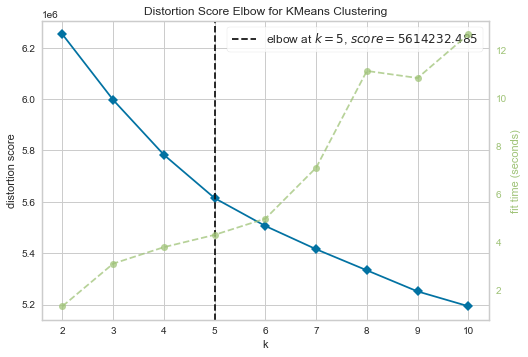

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
# Elbow Method - Visualize the inertia for different K values
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 11))
visualizer.fit(data_transformed)
visualizer.show()

In [17]:
# Apply K-means with the optimal number of clusters (K)
optimal_k=2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(data_transformed)



In [18]:
# Add the cluster labels to the original data
dataset['Clusters'] = cluster_labels

dataset

,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death,Clusters
0,68.000000,22.730000,0,Caucasian,M,180.3,Floor,admit,CTICU,0.541667,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0,1
1,77.000000,27.420000,0,Caucasian,F,160.0,Floor,admit,Med-Surg ICU,0.927778,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0,1
2,25.000000,31.950000,0,Caucasian,F,172.7,Accident & Emergency,admit,Med-Surg ICU,0.000694,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0,0
3,81.000000,22.640000,1,Caucasian,F,165.1,Operating Room / Recovery,admit,CTICU,0.000694,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0,1
4,19.000000,29.185818,0,Caucasian,M,188.0,Accident & Emergency,admit,Med-Surg ICU,0.073611,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,75.000000,23.060250,0,Caucasian,M,177.8,Floor,admit,Cardiac ICU,0.298611,...,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,0,1
91709,56.000000,47.179671,0,Caucasian,F,183.0,Floor,admit,Med-Surg ICU,0.120139,...,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0,1
91710,48.000000,27.236914,0,Caucasian,M,170.2,Accident & Emergency,admit,Med-Surg ICU,0.046528,...,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0,1
91711,62.309516,23.297481,0,Caucasian,F,154.9,Accident & Emergency,admit,Med-Surg ICU,0.081944,...,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0,1


In [19]:
silhouette_avg = silhouette_score(data_transformed, cluster_labels)

In [20]:
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.10892543771446125


In [21]:
from sklearn.decomposition import PCA

In [22]:
# Reduce the data to 2D using PCA for visualization
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_transformed)



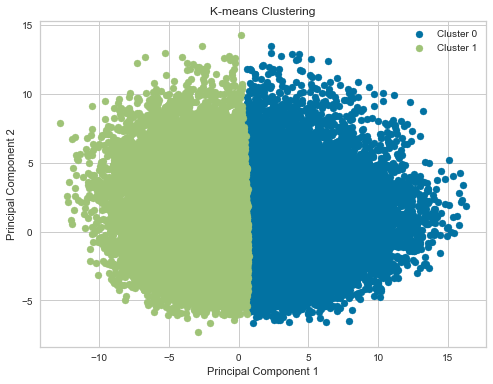

In [23]:
# Create a scatter plot for each cluster
plt.figure(figsize=(8, 6))
for cluster_id in range(optimal_k):
    cluster_data = data_2d[dataset['Clusters'] == cluster_id]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_id}')

plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [23]:
wcss = kmeans.inertia_
wcss

6251826.099489974

In [24]:
dataset['Clusters'].value_counts()

1    54132
0    37581
Name: Clusters, dtype: int64

In [25]:
dataset[dataset['Clusters'] == cluster_id]

,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death,Clusters
0,68.000000,22.730000,0,Caucasian,M,180.3,Floor,admit,CTICU,0.541667,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0,1
1,77.000000,27.420000,0,Caucasian,F,160.0,Floor,admit,Med-Surg ICU,0.927778,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0,1
3,81.000000,22.640000,1,Caucasian,F,165.1,Operating Room / Recovery,admit,CTICU,0.000694,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0,1
7,70.000000,29.185818,0,Caucasian,M,165.0,Accident & Emergency,admit,Med-Surg ICU,0.002083,...,0.0,0.0,1.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0,1
8,45.000000,29.185818,0,Caucasian,M,170.2,Other Hospital,admit,CCU-CTICU,0.009028,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,75.000000,23.060250,0,Caucasian,M,177.8,Floor,admit,Cardiac ICU,0.298611,...,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,0,1
91709,56.000000,47.179671,0,Caucasian,F,183.0,Floor,admit,Med-Surg ICU,0.120139,...,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0,1
91710,48.000000,27.236914,0,Caucasian,M,170.2,Accident & Emergency,admit,Med-Surg ICU,0.046528,...,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0,1
91711,62.309516,23.297481,0,Caucasian,F,154.9,Accident & Emergency,admit,Med-Surg ICU,0.081944,...,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0,1


In [26]:
# Group data by cluster labels and calculate mean values for each feature within each cluster
cluster_means = dataset.groupby('Clusters').mean()

# Find the distinguished features for each cluster
distinguished_features = {}
for cluster_id in range(optimal_k):
    cluster_feature_means = cluster_means.loc[cluster_id]
    distinguished_features[cluster_id] = cluster_feature_means[cluster_feature_means > cluster_means.mean()]

# Display the distinguished features for each cluster
for cluster_id, features in distinguished_features.items():
    print(f"Cluster {cluster_id}:")
    print(features.index.tolist())
    print()

Cluster 0:
['bmi', 'height', 'weight', 'apache_2_diagnosis', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache', 'map_apache', 'resprate_apache', 'temp_apache', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min', 'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min', 'h1_mbp_max', 'h1_mbp_min', 'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_resprate_max', 'h1_resprate_min', 'h1_spo2_min', 'h1_sysbp_max', 'h1_sysbp_min', 'h1_sysbp_noninvasive_max', 'h1_sysbp_noninvasive_min', 'd1_glucose_min', 'aids']

Cluster 1:
['age', 'elective_surgery', 'pre_icu_los_days', 'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache', 'gcs_unable_apache', 'heart_rate_apache', 

## H-Clustering

In [27]:
#Subset the data
subset_size = int(0.1 * len(data_transformed))  


In [28]:
# Randomly sample the subset from the data
subset_indices = np.random.choice(len(data_transformed), size=subset_size, replace=False)
subset_data = data_transformed[subset_indices]



In [29]:
# Create an AgglomerativeClustering instance and fit the model to the subset data
hierarchical_clustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
hierarchical_clustering.fit(subset_data)

# Get the cluster assignments from hierarchical clustering on the subset
cluster_labels_subset = hierarchical_clustering.labels_

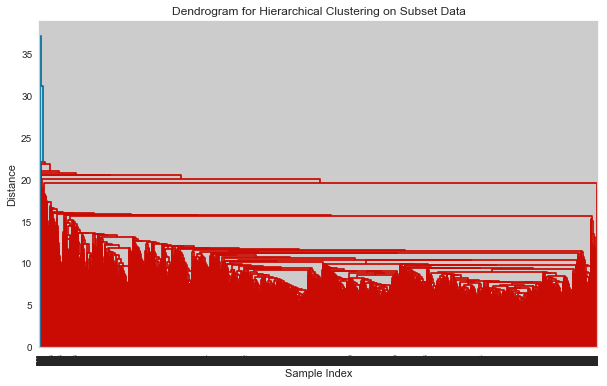

In [30]:
# Perform hierarchical linkage on the subset data
Z = linkage(subset_data, method='average')

# Visualize the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title("Dendrogram for Hierarchical Clustering on Subset Data")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

In [31]:
silhouette_avg_subset = silhouette_score(subset_data, cluster_labels_subset)

print("Silhouette Score for the Subset:", silhouette_avg_subset)

Silhouette Score for the Subset: 0.39257102617710704


In [32]:
# Create an AgglomerativeClustering instance and fit the model to the subset data
hierarchical_clustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single')
hierarchical_clustering.fit(subset_data)

# Get the cluster assignments from hierarchical clustering on the subset
cluster_labels_subset = hierarchical_clustering.labels_

In [ ]:
silhouette_avg_subset = silhouette_score(subset_data, cluster_labels_subset)

print("Silhouette Score for the Subset:", silhouette_avg_subset)

In [38]:
#Separate numeric and categorical columns
numeric_columns = dataset.select_dtypes(include='number')
categorical_columns = dataset.select_dtypes(include='object')

# Perform one-hot encoding on categorical columns
categorical_columns_encoded = pd.get_dummies(categorical_columns)

# Combine numeric and encoded categorical columns
data_encoded = pd.concat([numeric_columns, categorical_columns_encoded], axis=1)

In [39]:
# Separate the target variable from the features
target_variable = 'hospital_death'  
X = data_encoded.drop([target_variable], axis=1)
y = data_encoded[target_variable]

In [40]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:

# Train a logistic regression model using the cluster labels as features
model = LogisticRegression()
model.fit(X_train, y_train)


C:\Users\shste\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:

# Make predictions on the testing set
y_pred = model.predict(X_test)



In [43]:
# Calculate accuracy of the predictive model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the predictive model: {accuracy}")

Accuracy of the predictive model: 0.917134601755438
